In [ ]:
from data_utils import single_np_datapoint_generator 
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
train_dataset_files = [
 './data/tfrecords/0.tfrecord',
 './data/tfrecords/1.tfrecord',
 './data/tfrecords/2.tfrecord',
 './data/tfrecords/3.tfrecord',
 './data/tfrecords/4.tfrecord',
 './data/tfrecords/5.tfrecord',
 './data/tfrecords/6.tfrecord',
 './data/tfrecords/7.tfrecord',
 './data/tfrecords/8.tfrecord',
   
]

validation_dataset_files = ['./data/tfrecords/9.tfrecord']

In [ ]:
dimensions = []
age = []
gender = []
bb = []
for _, output in single_np_datapoint_generator(train_dataset_files):
  pos = np.argwhere(output[:, :, 0] > 0.5)[0]
  dimensions.append(output[pos[0], pos[1], 3:5]*32)
  bb.append(output[pos[0], pos[1], 1:3])
  
dimensions = np.array(dimensions)
bb = np.array(bb)

<function matplotlib.pyplot.show>

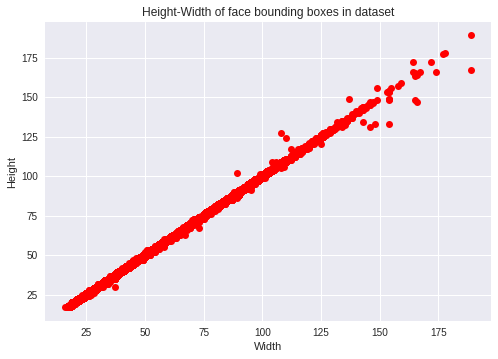

In [12]:
plt.plot(dimensions[:, 0], dimensions[:, 1], "ro")
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Height-Width of face bounding boxes in dataset")
plt.show

Text(0.5,1,'XY of face centers in dataset')

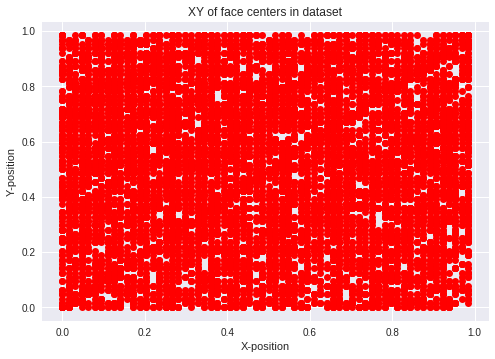

In [13]:
plt.plot(bb[:, 0], bb[:, 1], "ro")
plt.xlabel("X-position")
plt.ylabel("Y-position")
plt.title("XY of face centers in dataset")

In [ ]:
train_dataset_files = [
 './data/tfrecords/0_cropped.tfrecord',
 './data/tfrecords/1_cropped.tfrecord',
 './data/tfrecords/2_cropped.tfrecord',
 './data/tfrecords/3_cropped.tfrecord',
 './data/tfrecords/4_cropped.tfrecord',
 './data/tfrecords/5_cropped.tfrecord',
 './data/tfrecords/6_cropped.tfrecord',
 './data/tfrecords/7_cropped.tfrecord',
 './data/tfrecords/8_cropped.tfrecord',
   
]

validation_dataset_files = ['./data/tfrecords/9_cropped.tfrecord']

In [ ]:
age_c = []
gender_c = []
for _, output in single_np_datapoint_generator(train_dataset_files, raw_values=True):
    age_c.append(output[-1])
    gender_c.append(output[-2])
np_age = np.array(age_c)
np_gender_c = np.array(gender_c)

In [29]:
unique, counts = np.unique(np_gender_c, return_counts=True)
gender_counts = dict(zip(unique, counts))
print("Gender Counts", gender_counts)
total_count = len(gender_c)
print("Gender percentages:", {k: v/total_count for k,v in gender_counts.items()})

Gender Counts {0.0: 5865, 1.0: 7860}
Gender percentages: {0.0: 0.4273224043715847, 1.0: 0.5726775956284152}


##### The count of male and female shows that the gender labels are unequally distributed in the training dataset. The dataset has more male labels than female. Let us now compare the ratio of each class.

Age counts:  {10.0: 23, 11.0: 43, 12.0: 36, 13.0: 21, 14.0: 92, 15.0: 44, 16.0: 44, 17.0: 70, 18.0: 70, 19.0: 127, 20.0: 272, 21.0: 309, 22.0: 250, 23.0: 373, 24.0: 357, 25.0: 368, 26.0: 332, 27.0: 402, 28.0: 355, 29.0: 365, 30.0: 353, 31.0: 617, 32.0: 476, 33.0: 429, 34.0: 386, 35.0: 484, 36.0: 604, 37.0: 348, 38.0: 579, 39.0: 381, 40.0: 369, 41.0: 384, 42.0: 356, 43.0: 339, 44.0: 205, 45.0: 254, 46.0: 257, 47.0: 246, 48.0: 273, 49.0: 254, 50.0: 218, 51.0: 156, 52.0: 226, 53.0: 144, 54.0: 126, 55.0: 118, 56.0: 116, 57.0: 84, 58.0: 79, 59.0: 70, 60.0: 94, 61.0: 180, 62.0: 79, 63.0: 56, 64.0: 60, 65.0: 67, 66.0: 36, 67.0: 35, 68.0: 63, 69.0: 23, 70.0: 12, 71.0: 27, 72.0: 20, 73.0: 16, 74.0: 13, 75.0: 15, 76.0: 18, 77.0: 9, 78.0: 9, 79.0: 9}


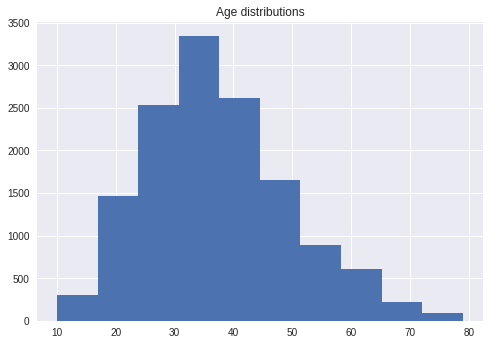

In [30]:
unique, counts = np.unique(np_age, return_counts=True)
age_counts = dict(zip(unique, counts))
print("Age counts: ", age_counts)
plt.hist(np_age)
plt.title("Age distributions")
plt.show()

In [31]:
def bin_count(unique, counts, bin_n):
    binned_dic = {}
    bin_start = unique[0]
    bin_end = unique[0] + bin_n
    binned_dic[str(bin_start)+"-"+str(bin_end)] = counts[0]
    for i in range(len(unique)):
        if unique[i] < bin_end:
            binned_dic[str(bin_start)+"-"+str(bin_end)] += counts[i]
        else:
            bin_start = unique[i]
            bin_end = unique[i] + bin_n
            binned_dic[str(bin_start)+"-"+str(bin_end)] = counts[i]
    return binned_dic


print("Count of age binned into a group of 10:", bin_count(unique, counts, 10)) 
print("Count of age binned into a group of 5:", bin_count(unique, counts, 5))

Count of age binned into a group of 10: {'10.0-20.0': 593, '20.0-30.0': 3383, '30.0-40.0': 4657, '40.0-50.0': 2937, '50.0-60.0': 1337, '60.0-70.0': 693, '70.0-80.0': 148}
Count of age binned into a group of 5: {'10.0-15.0': 238, '15.0-20.0': 355, '20.0-25.0': 1561, '25.0-30.0': 1822, '30.0-35.0': 2261, '35.0-40.0': 2396, '40.0-45.0': 1653, '45.0-50.0': 1284, '50.0-55.0': 870, '55.0-60.0': 467, '60.0-65.0': 469, '65.0-70.0': 224, '70.0-75.0': 88, '75.0-80.0': 60}
